**1.-Graficar como convergen  4  condiciones iniciales a las raiz real de  x^3−x^2−x−1  utilizando el método de Newton. Ésto básicamente es gráficar como se mueven los puntos  x_k , luego grafiquen el error relativo a la raiz, es decir  (x_k−S)/S(x_k−S)/S , donde  SS  es la raíz. (Tip: Si tienen un arreglo con todas las  x_k 's que arrojó el método, digamos list, prueben hacer directamente  (list−S)/S.**

In [73]:


#=Esta es la función del primer ejercicio de la tarea,  uno le debe dar la raiz, para que se pueda calcular el error. se definen dos arreglos xArray y yArray en los cuales se almacenaran los valores de las equis que obtenemos en las iteraciones, y el valor de la función evaluada en ellos respectivamente. Una vez que se han almacenado estos datos creamos nuestra gráfica. =#

using PyPlot
plt = PyPlot


function metodoNewtonGraph(f::Function ,g::Function,seed,root)
    
    x = seed
    xArray = []
    yArray = []
  
    push!(xArray,seed)
    push!(yArray,f(seed))
    
    while(abs(last(yArray)) >0.0000001)
        
        x=x-((f(x)/g(x)))
        
        push!(xArray,x)
        push!(yArray,f(x))
                
    end 
    
    errorArray = (xArray-root)/root
    
    #Grafico de puntos convergiendo
    plt.figure("the plot")
    plt.xlabel("x")
    plt.title("Gráficos cond. inicial: $(seed)")
    plt.grid()
    plt.scatter(xArray,yArray,color = "blue",label = "f(x)")
    
    #Gráfico de error
    plt.scatter(xArray,errorArray,color = "orange",label = "error")
    legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)
    
    plt.show()
end 

metodoNewtonGraph (generic function with 1 method)

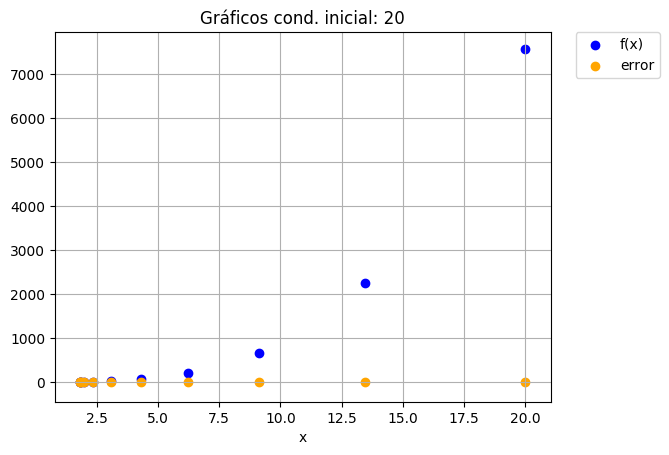

In [74]:
metodoNewtonGraph(x->x^3-x^2-x-1,x->3*x^2 -2*x-1,20,1.83929)

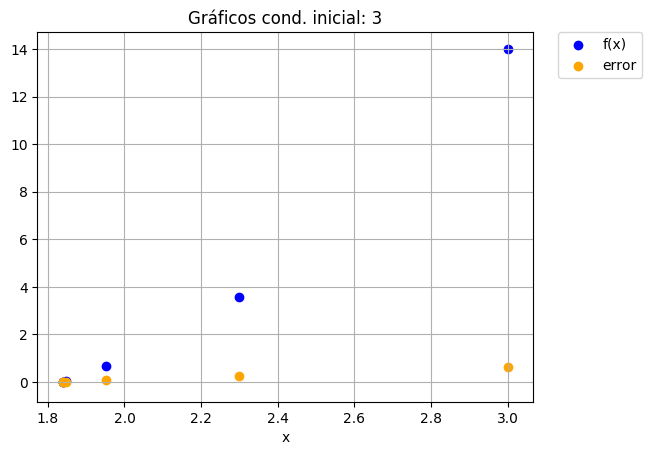

In [75]:
metodoNewtonGraph(x->x^3-x^2-x-1,x->3*x^2 -2*x-1,3,1.83929)

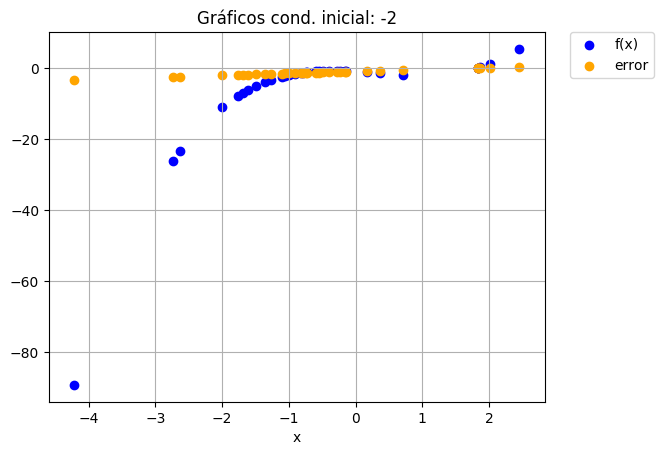

In [76]:
metodoNewtonGraph(x->x^3-x^2-x-1,x->3*x^2 -2*x-1,-2,1.83929)

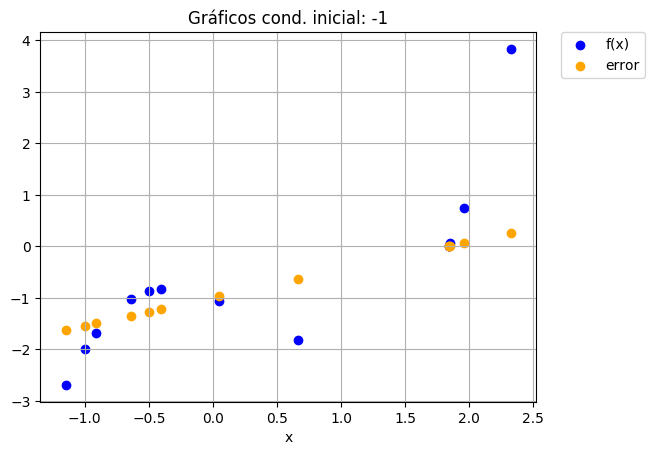

In [78]:
metodoNewtonGraph(x->x^3-x^2-x-1,x->3*x^2 -2*x-1,-1,1.83929)

**Hacer lo mismo con la funcion de biseccion **

In [6]:
using PyPlot
plt = PyPlot

function bisectionGraph(f::Function, c,d,root)
    a = c
    b = d
    p = (a+b)/2
    N = 200
    values = []
    functionValues = []
    push!(values,p)
    push!(functionValues,f(p))
    
    for i in 1:N
        if  f(a)*f(p) > 0
            a = p
        end
        
        if f(b)*f(p) > 0
            b = p
        end
        p = (a+b)/2
        push!(values, p)
        push!(functionValues,f(p))
    end
    println("ultimo valor ",last(values))
    errorArray = (values-root)/root
    
    #Grafico de puntos convergiendo
    plt.figure("the plot")
    plt.xlabel("x")
    plt.title("Gráficos biseccion a = $(c), b = $(d)")
    plt.grid()
    plt.scatter(values,functionValues,color = "blue",label = "f(x)")
    
    #Gráfico de error
    plt.scatter(values,errorArray,color = "orange",label = "error")
    legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)
    plt.show()
    
    
    
end



bisectionGraph (generic function with 1 method)

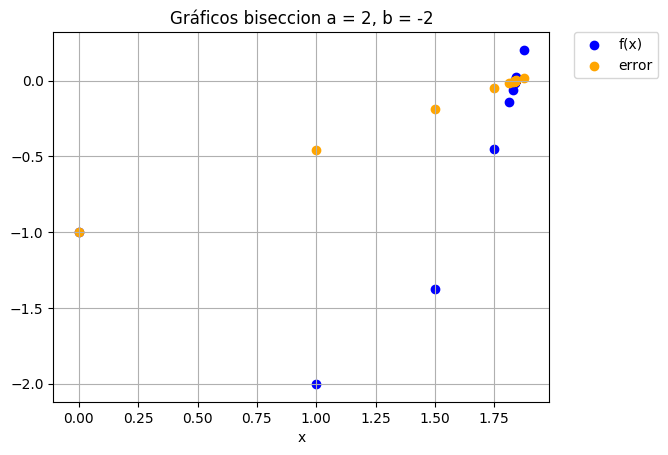

ultimo valor 1.839286755214161


In [7]:
bisectionGraph(x->x^3-x^2-x-1,2,-2,1.83929)

**  2.- Crear una función que  tome como argumentos tanto a la función, su derivada y la condición inicial. Es decir, el input debe ser metodo_newton(f,df,x0). El output debe ser alguna raíz.**

In [120]:
#=Esta es nuestra función. La condición para detenerse es que se supere el número maximo de iteraciones (200) o que la función evaluada en las x que vamos obteniendo en las iteraciones se haga suficientemente pequeño=#

function newtonMethod(f::Function,g::Function,seed)
    MAX_N = 200;
    numIter = 0
    x = seed 
   while(abs(f(x))>0.00001)
        if(numIter<MAX_N)
        x = x-f(x)/g(x)        
        numIter+=1
        else
           break 
        end   
end 
    return x
end

newtonMethod (generic function with 1 method)

In [121]:
newtonMethod(x->x^3-x^2-x-1,x->3*x^2 -2*x-1,-1)

1.83928676250499

**3.-Hacer la misma función pero que en lugar de tomar como argumento una condición inicial, tome un intervalo, por ejemplo costruido con linspace. Es muy probable que funcione llamando la funcion que crearon como metodo_newton.(f,df,x). Si no funciona la sintaxis creen una rutina solo para vectores, que seria lo previo al siguiente punto. El ouput debe ser un arreglo donde las entradas son raices, no importa que estén repetidas.**

In [122]:
#=Esta funcion recibira un arreglo, y realizará el metodo de newton para cada uno de los valores de este=#

function newtonMethodInterval(f::Function,g::Function,interval)
   
    values = []
    
    for i in 1:length(interval)
       push!(values,newtonMethod(f,g,interval[i]))
    end
    return values
end


newtonMethodInterval (generic function with 1 method)

In [123]:
newtonMethodInterval(x->x^3-x^2-x-1,x->3*x^2 -2*x-1,linspace(-100.,100.,50))


50-element Array{Any,1}:
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 ⋮      
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929

**4.-Crear la misma rutina, pero que esta vez solo reciba intervalos (objetos linspace) y que revise el arreglo despues de  200  iteraciones y solo tome las raices diferentes hasta cierto  ϵ .**

In [132]:
function newtonMethodSpitRoots(f::Function,g::Function,interval,epsilon)
    
    #=Para asegurarnos de que realmente nos estan dando un intervalo checamos las dimensiones de interval =#
    
    if(ndims(interval) ==1)
    values = []
    
    for i in 1:length(interval)
       push!(values,newtonMethod(f,g,interval[i]))
    end
    
    #=Ahora tenemos que buscar las raices distintas con nuestro arreglo creado, asi que usaremos la funcion auxiliar searchRoots=#
        
        roots =  searchRoots(f,epsilon,values)
        
        return roots
        
    else
        println("Error: Se requiere dar un arreglo para esta funcion")
    end

end

newtonMethodSpitRoots (generic function with 1 method)

In [129]:
function searchRoots(f::Function, epsilon, values)
    roots = []
    isEqual = false
    push!(roots,values[1])
    
    for v in values
        #=Solo vamos a considerar como candidatos a aquellas raices que evaluadas en la funcion den un numero cercano a cero=#
        
        if(abs(f(v))<0.00001)
            for v2 in roots 
                if(v2<v+epsilon && v2>v-epsilon)
                    isEqual = true                    
                end 
            end 
            
            if(isEqual)
                isEqual = false
            else
                push!(roots,v)
            end 
        end 
    end 
    return roots 
end 

searchRoots (generic function with 1 method)

In [130]:
newtonMethodSpitRoots(x->x^3-x^2-x-1,x->3*x^2 -2*x-1,3,0.01)

Error: Se requiere dar un arreglo para esta funcion


In [133]:
#=vemos que nos da un arreglo con la raiz =#
newtonMethodSpitRoots(x->x^3-x^2-x-1,x->3*x^2 -2*x-1,linspace(-100.,100.,50),0.01)

1-element Array{Any,1}:
 1.83929

In [134]:
#=hagamos una prueba con otra funcion=#
newtonMethodSpitRoots(x->x^2-5*x+6,x->2*x-5,linspace(-100.,100.,50),0.01)

2-element Array{Any,1}:
 2.0
 3.0

**4.-Finalmente, desarrollen una función similar a la anterior, siguiendo los mismos pasos, pero esta vez que los inputs de la función del método sean solamente la función y la condición inicial.**


Vamos de hecho a hacer todas las funciones que ya habiamos hecho, pero ahora solo necesitaremos un parametro



In [85]:
using SymPy
A,x,a,n,m=symbols("A,x,a,n,m")

function newtonMethod2(f::Function,seed)
    derPy =simplify(diff(f),[x])
    der = lambdify(derPy,[x])
    MAX_N = 200
    valor = seed
    iteraciones = 0
    
    while(abs(f(valor))>0.00001)
        if(iteraciones<MAX_N)
            valor=valor-(f(valor)/der(valor))
            iteraciones+=1
            
        else
            println("demasiadas iteraciones, es posible que no converja")
           break 
        end
    end    
    return valor
end

newtonMethod2 (generic function with 1 method)

In [92]:
newtonMethod2(x->x^3-x^2-x-1,2.)

1.8392868100680193

In [93]:
function newtonMethodInterval2(f::Function,interval)

values = []
    
    for i in 1:length(interval)
       push!(values,newtonMethod2(f,interval[i]))
    end
    return values
end


newtonMethodInterval2 (generic function with 1 method)

In [94]:
newtonMethodInterval2(x->x^3-x^2-x-1,linspace(-1.,1.,50))

50-element Array{Any,1}:
   1.83929
   1.83929
   1.83929
   1.83929
   1.83929
   1.83929
   1.83929
   1.83929
   1.83929
   1.83929
   1.83929
   1.83929
   1.83929
   ⋮      
   1.83929
   1.83929
   1.83929
   1.83929
   1.83929
   1.83929
   1.83929
   1.83929
   1.83929
   1.83929
   1.83929
 Inf      

In [136]:
    
  function newtonMethodSpitRoots2(f::Function,interval,epsilon)
    
    #=Para asegurarnos de que realmente nos estan dando un intervalo checamos las dimensiones de interval =#
    
    if(ndims(interval) ==1)
    values = []
    
    for i in 1:length(interval)
       push!(values,newtonMethod2(f,interval[i]))
    end
    
    #=Ahora tenemos que buscar las raices distintas con nuestro arreglo creado, asi que usaremos la funcion auxiliar searchRoots=#
        
        roots =  searchRoots(f,epsilon,values)
        
        return roots
        
    else
        println("Error: Se requiere dar un arreglo para esta funcion")
    end

end  
    

newtonMethodSpitRoots2 (generic function with 1 method)

In [137]:
newtonMethodSpitRoots2(x->x^3-x^2-x-1,linspace(-100.,100.,50),0.01)

1-element Array{Any,1}:
 1.83929

In [138]:
newtonMethodSpitRoots2(x->x^2-5*x+6,linspace(-100.,100.,50),0.01)

2-element Array{Any,1}:
 2.0
 3.0